# Unsupervised Machine Learning Credit Card Analysis


Imports of our problem

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
sns.set(rc={'figure.figsize':(11.7,8.27)}) # isso é pras figuras ficarem maiores

Loading the data

In [2]:

df = pd.read_csv('../data/Credit_Card_Customer_Data.csv')
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


We can drop "Sl_No" and "Customer Key"

In [3]:
df = df.drop(columns=["Sl_No","Customer Key"])
df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


## 2) EDA

Analyzing statistics

In [4]:
df.describe().round() 

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.0,660.0,660.0,660.0,660.0
mean,34574.0,5.0,2.0,3.0,4.0
std,37625.0,2.0,2.0,3.0,3.0
min,3000.0,1.0,0.0,0.0,0.0
25%,10000.0,3.0,1.0,1.0,1.0
50%,18000.0,5.0,2.0,2.0,3.0
75%,48000.0,6.0,4.0,4.0,5.0
max,200000.0,10.0,5.0,15.0,10.0


Number of null values in each feature

In [5]:
df.isna().sum() 

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

### 2.1) Histogram



Runnig the pairplot and defining the diagonal in the histogram form

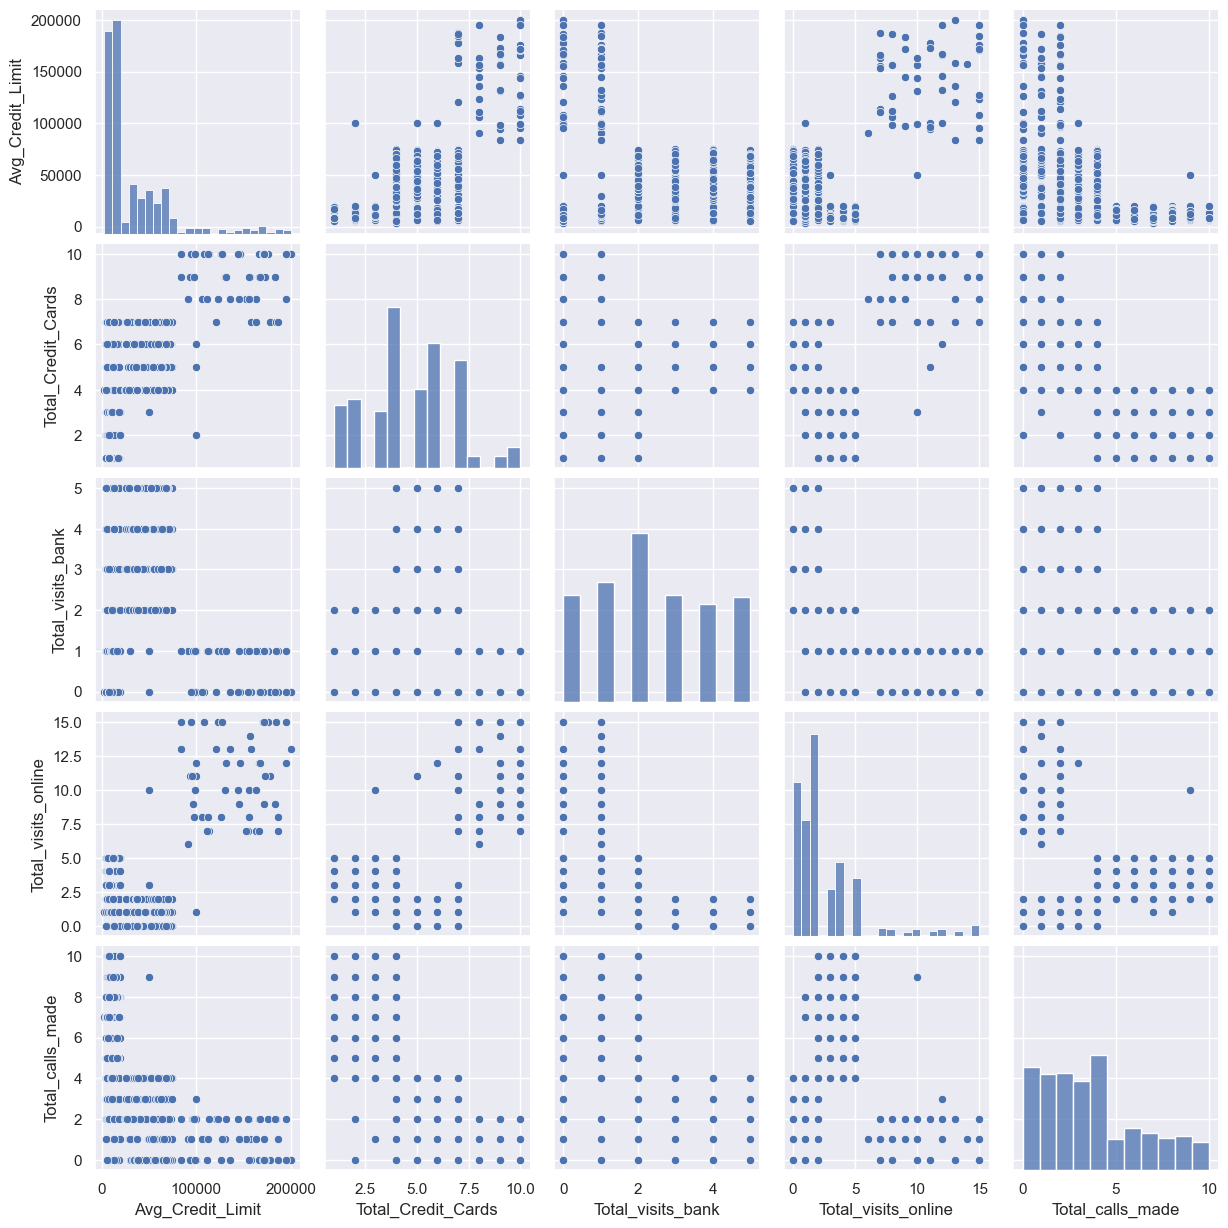

In [6]:
sns.pairplot(df,diag_kind = 'hist')

<AxesSubplot: xlabel='Avg_Credit_Limit', ylabel='Count'>

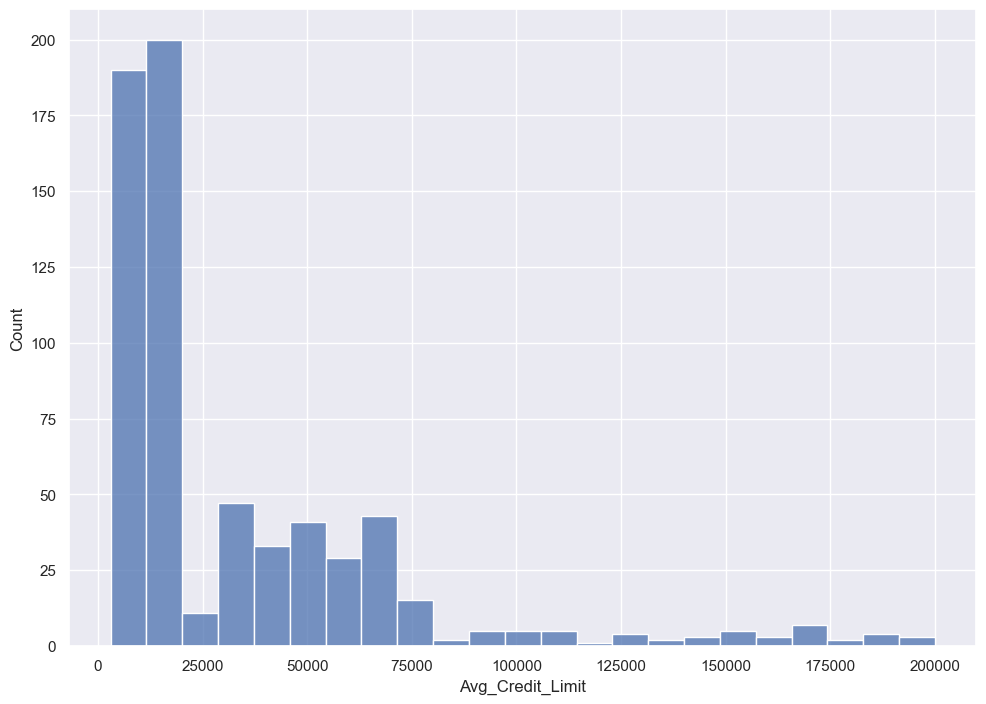

In [7]:
sns.histplot(x="Avg_Credit_Limit", data=df)

<AxesSubplot: xlabel='Total_Credit_Cards', ylabel='Count'>

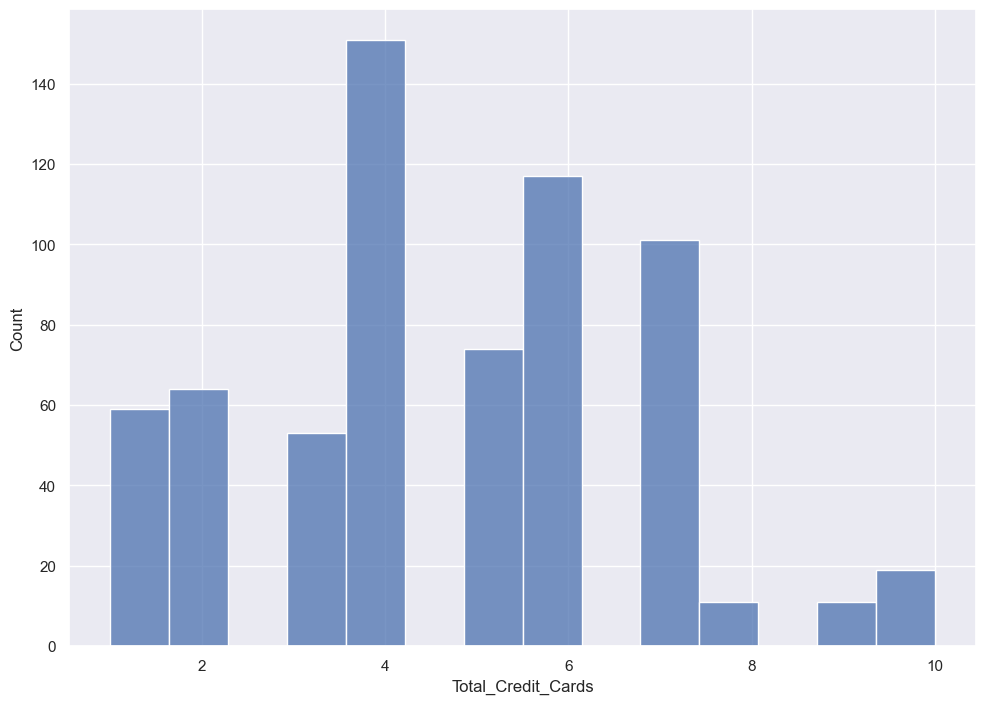

In [8]:
sns.histplot(x="Total_Credit_Cards", data=df)

<AxesSubplot: xlabel='Total_visits_bank', ylabel='Count'>

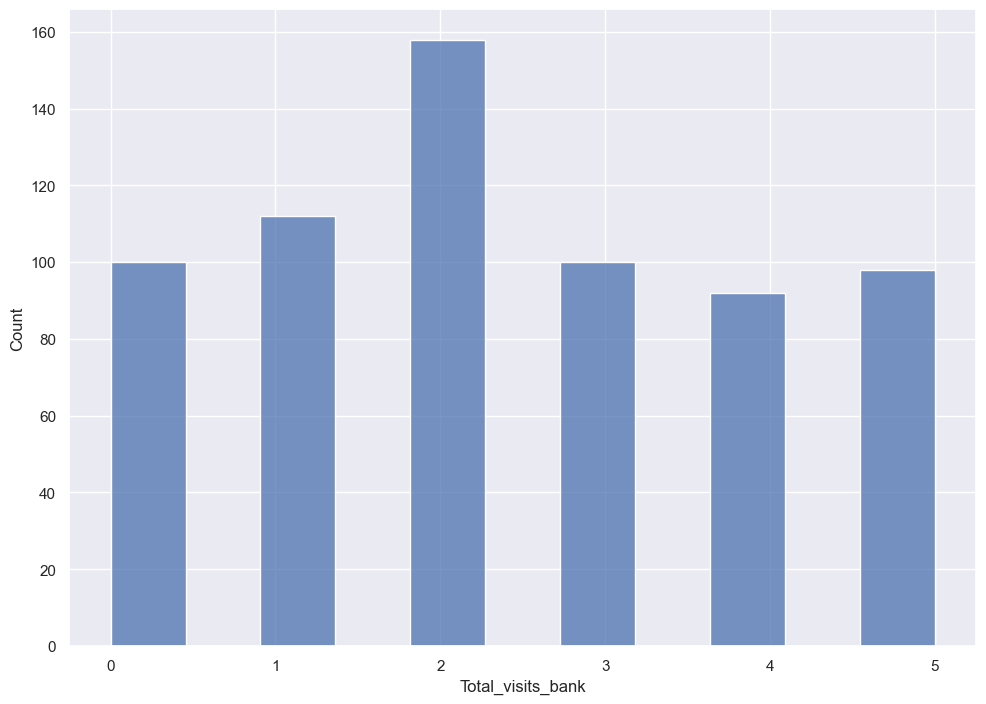

In [9]:
sns.histplot(x="Total_visits_bank", data=df)

<AxesSubplot: xlabel='Total_visits_online', ylabel='Count'>

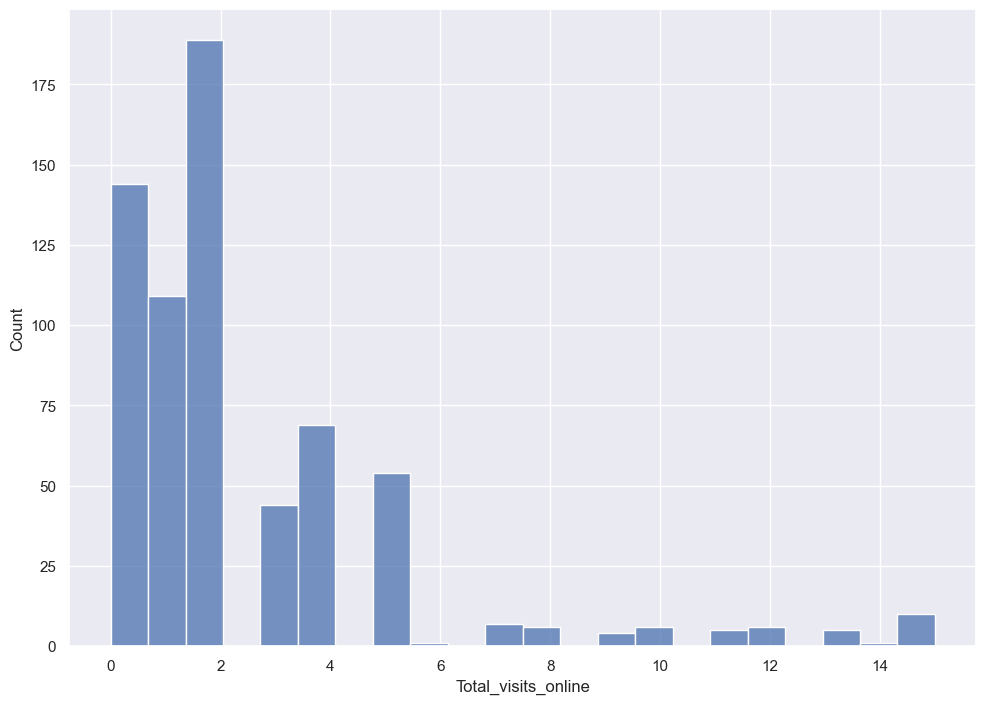

In [10]:
sns.histplot(x='Total_visits_online', data=df)

<AxesSubplot: xlabel='Total_calls_made', ylabel='Count'>

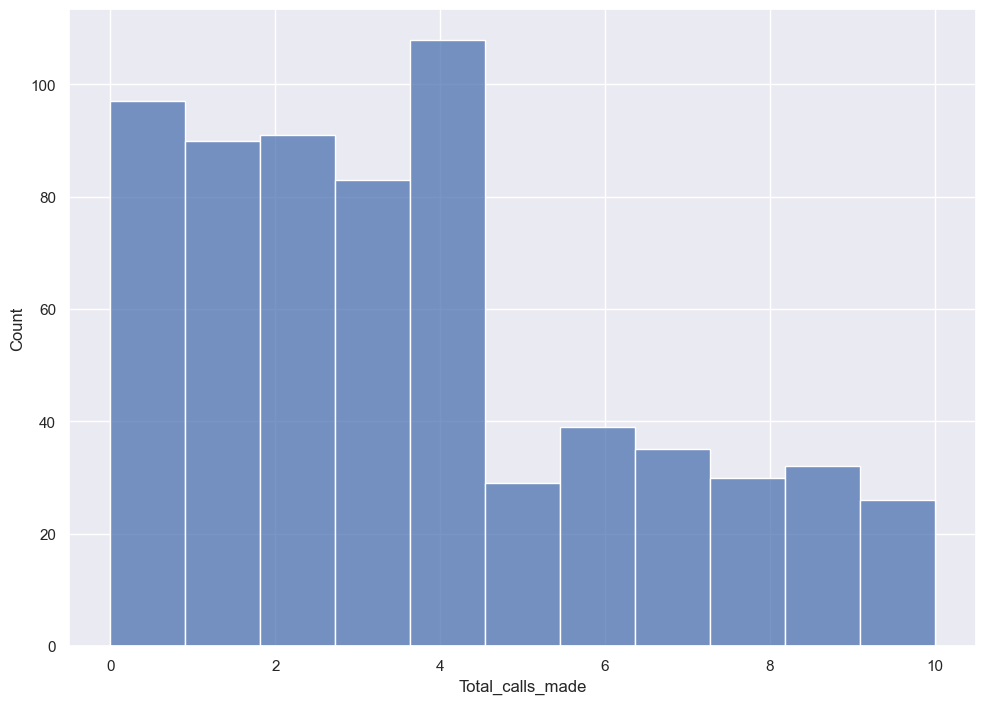

In [11]:
sns.histplot(x='Total_calls_made', data=df)

### 2.2) Outliers

As we can see, outliers are not a problem here.

In [12]:
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


### 2.3) Standardization

Let's use here, the StandardScaler from sklearn.

In [13]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

## 3) Hierarchical clustering


### 3.1) How many Clusters?

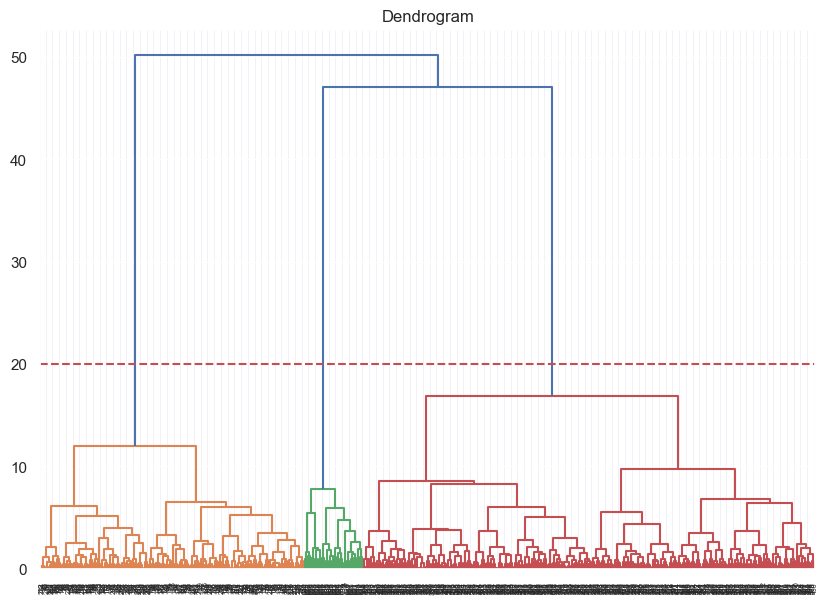

In [14]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=20, color='r', linestyle='--')

Let's consider 3 clusters

### 3.2) Clustering

In [15]:
cluster = AgglomerativeClustering(n_clusters=3)  
labels_hier = cluster.fit_predict(data_scaled)
df_hier=df
df_hier['labels_hier']=labels_hier.astype('str') # aqui atribuimos o numero de cada clusters

### 3.3) Cluster Analysis

To better visualize this distribution, we can cross-reference some variables and see how the clustering looks.

<AxesSubplot: xlabel='P1', ylabel='P2'>

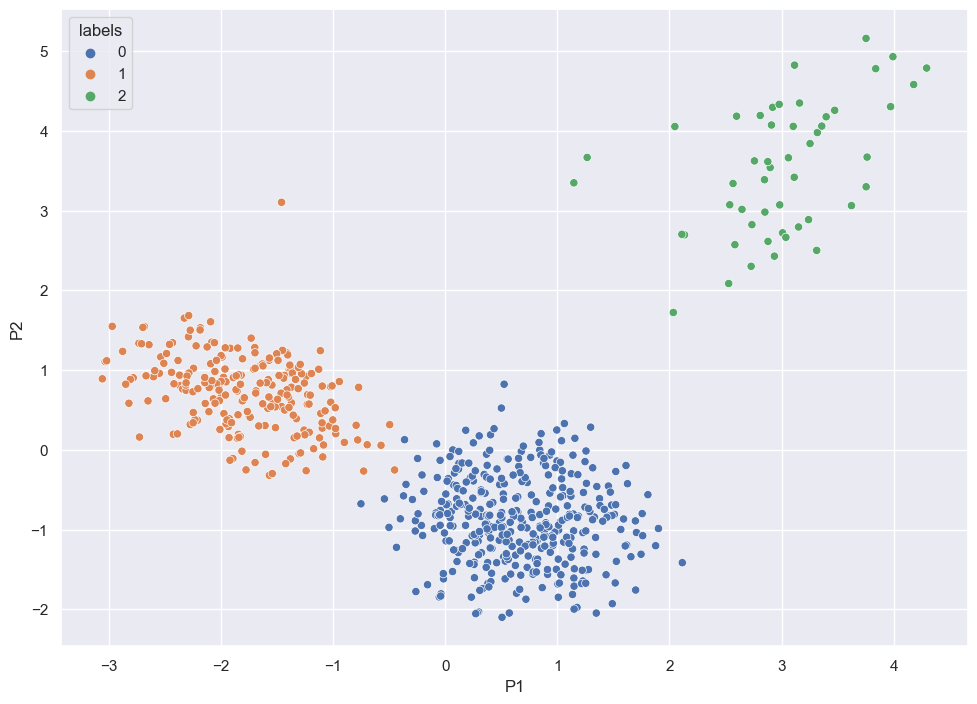

In [16]:
#para visualizar melhor essa distribuição, podemos cruzar algumas variáveis e ver como fica a clusterização
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2'])
principalDf['labels']=df_hier['labels_hier']
sns.scatterplot(data=principalDf,x='P1',y='P2',hue='labels')

## 4) K-Means

### 4.1) Elbow method for selecting the number of clusters.

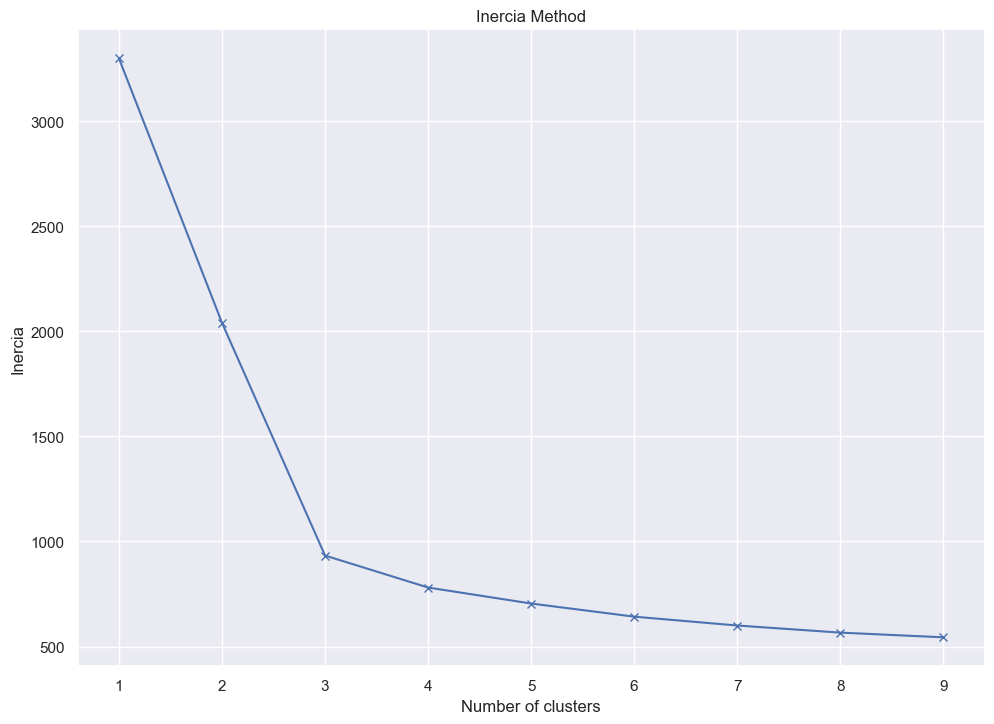

In [17]:
inertias = []
K = range(1, 10)
from scipy.spatial.distance import cdist
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(data_scaled)
    inertias.append(kmeanModel.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inercia')
plt.title('Inercia Method')
plt.show()

Let's select 3 clusters


### 4.2) Model

In [18]:
model = KMeans(3) #aqui treinamos o modelo
labels_kmeans = model.fit_predict(data_scaled) #lembre-se de treinar com os dados normalizados
df_kmeans=df
df_kmeans['labels_kmeans']=labels_kmeans.astype('str') # aqui atribuimos o numero de cada clusters

### 4.3) Cluster Analysis

<AxesSubplot: xlabel='P1', ylabel='P2'>

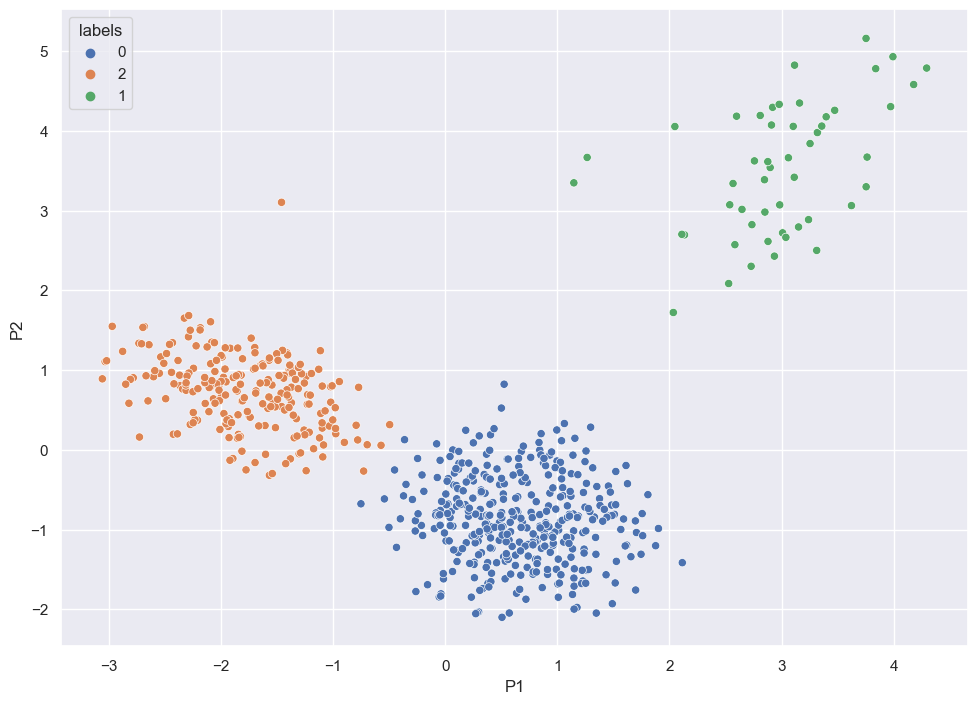

In [19]:
#para visualizar melhor essa distribuição, podemos cruzar algumas variáveis e ver como fica a clusterização
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2'])
principalDf['labels']=df_kmeans['labels_kmeans']
sns.scatterplot(data=principalDf,x='P1',y='P2',hue='labels')

## 5) DBSCAN

### 5.1) Determination of the neighbor distance value

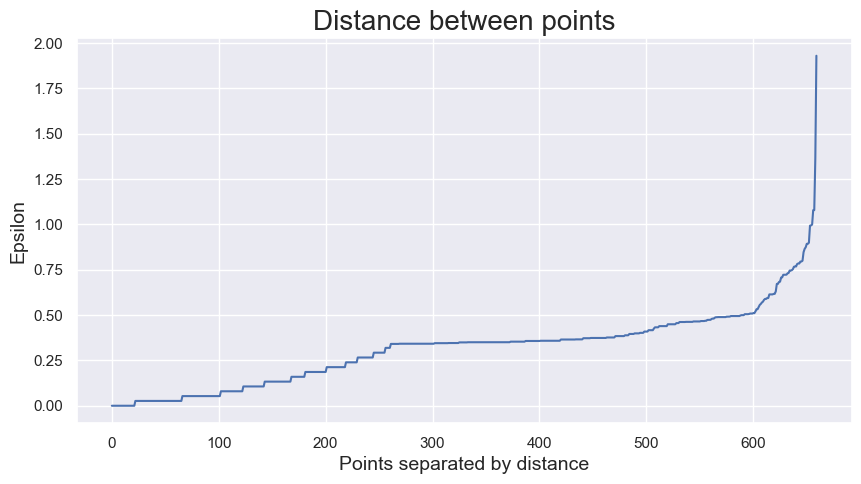

In [20]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('Distance between points',fontsize=20)
plt.xlabel('Points separated by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

Here we will select 0.75.

### 5.2) Model

In [21]:
db = DBSCAN(eps=0.5, min_samples=10).fit(data_scaled)
labels_dbscan = db.labels_
df_dbscan=df
df_dbscan['labels_dbscan']=labels_dbscan.astype('str')

### 5.3) Cluster Analysis


<AxesSubplot: xlabel='P1', ylabel='P2'>

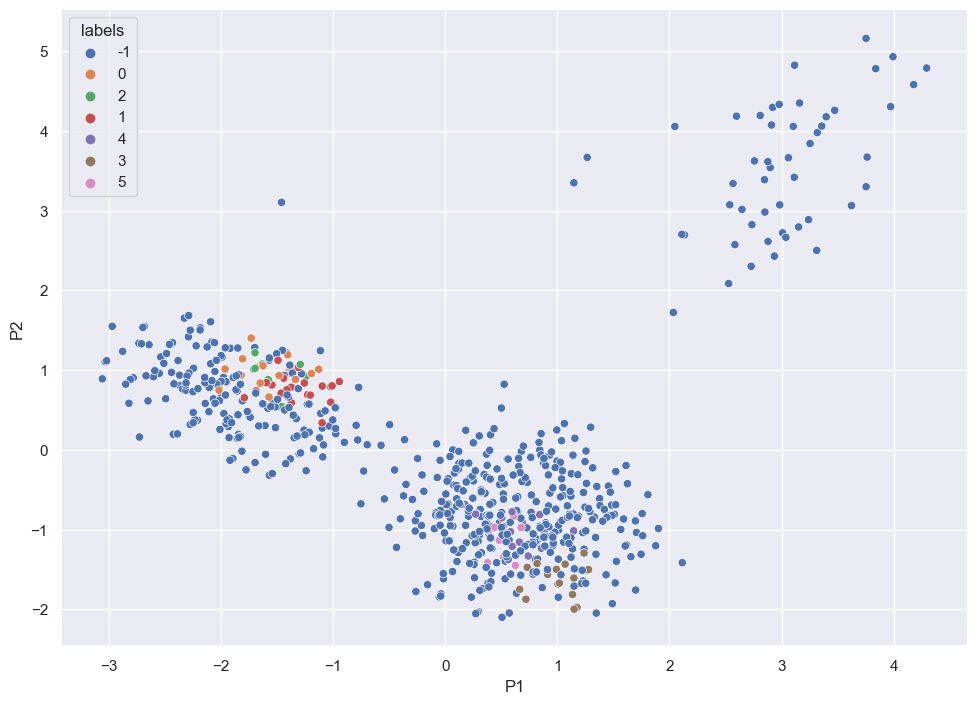

In [22]:
#para visualizar melhor essa distribuição, podemos cruzar algumas variáveis e ver como fica a clusterização
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2'])
principalDf['labels']=df_dbscan['labels_dbscan']
sns.scatterplot(data=principalDf,x='P1',y='P2',hue='labels')

Here we see that the DBSCAN did not separate the clusters very well, and the outliers appear to be their own cluster. One possible reason for this misclassification is that the distances between points are not the same for points in the same cluster. We can reduce the dimensionality of the data and use the two dimensions as training data.

<AxesSubplot: xlabel='P1', ylabel='P2'>

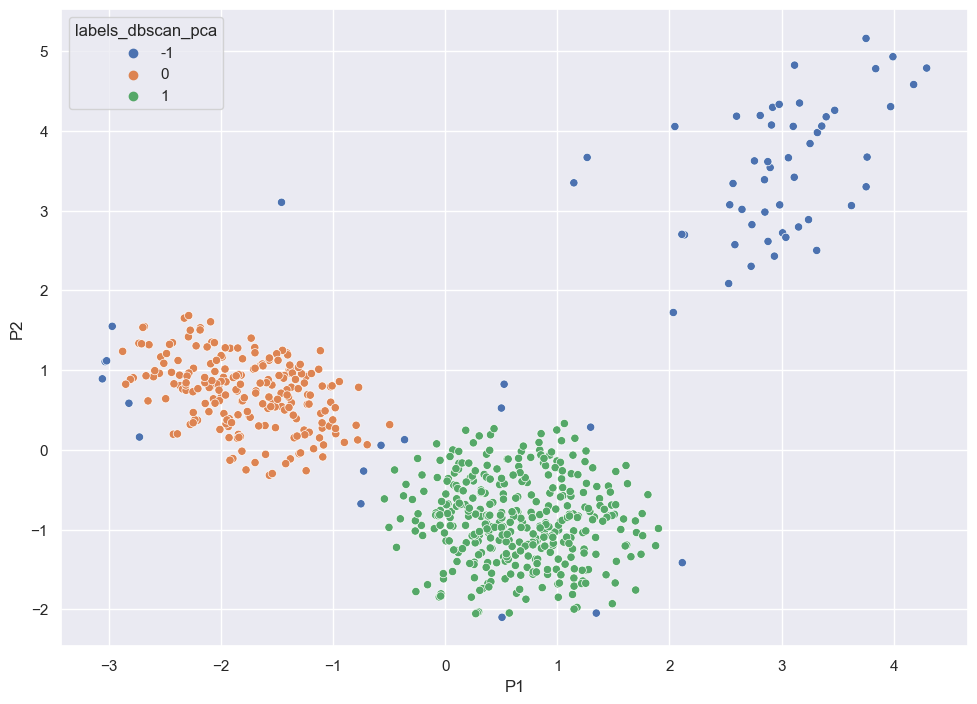

In [23]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)
principalDf_dbscan = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2'])

db_PCA = DBSCAN(eps=0.3, min_samples=10).fit(principalDf_dbscan)
labels_dbscan_pca = db_PCA.labels_
df_dbscan_PCA=df
df_dbscan_PCA['labels_dbscan_pca']=labels_dbscan_pca.astype('str')

principalDf_dbscan['labels_dbscan_pca']=labels_dbscan_pca.astype('str')
sns.scatterplot(data=principalDf_dbscan,x='P1',y='P2',hue='labels_dbscan_pca')

Since the points on the upper left side are more spread out, the DBSCAN does not identify them as a cluster but rather as outliers.

## 6) Meanshift

### 6.1) Estimating the bandwidth

In [24]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [25]:
bandwidth = estimate_bandwidth(data_scaled, quantile=0.1)

In [26]:
bandwidth

1.4062802291365657

### 6.2) Model

In [27]:
ms = MeanShift().fit(data_scaled)
labels_meanshift = ms.labels_
df_meanshift=df
df_meanshift['labels_meanshift']=labels_meanshift.astype('str')

### 6.3) Cluster Analysis

<AxesSubplot: xlabel='P1', ylabel='P2'>

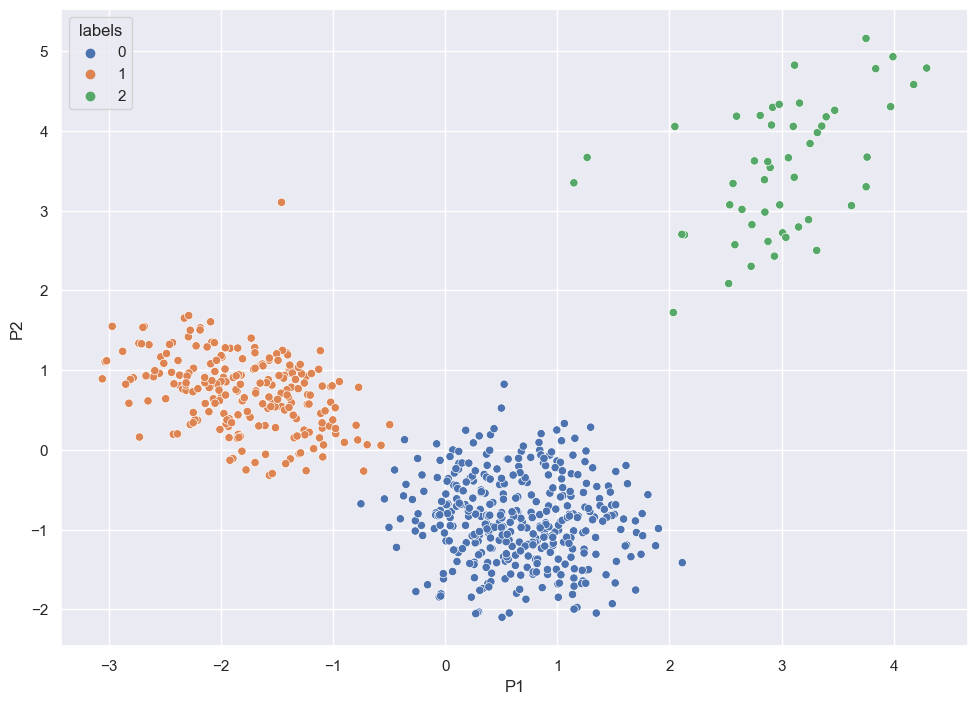

In [28]:
#para visualizar melhor essa distribuição, podemos cruzar algumas variáveis e ver como fica a clusterização
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2'])
principalDf['labels']=df_meanshift['labels_meanshift']
sns.scatterplot(data=principalDf,x='P1',y='P2',hue='labels')

The fitting generated many clusters with few data points, so let's increase the quantile and see if we generate a larger distance (bandwidth) and then generate the clusters again!

In [29]:
bandwidth = estimate_bandwidth(data_scaled, quantile=0.2)
bandwidth

1.7196647492114912

In [30]:
ms = MeanShift(bandwidth=bandwidth).fit(data_scaled)
labels_meanshift = ms.labels_
df_meanshift=df
df_meanshift['labels_meanshift']=labels_meanshift.astype('str')

<AxesSubplot: xlabel='P1', ylabel='P2'>

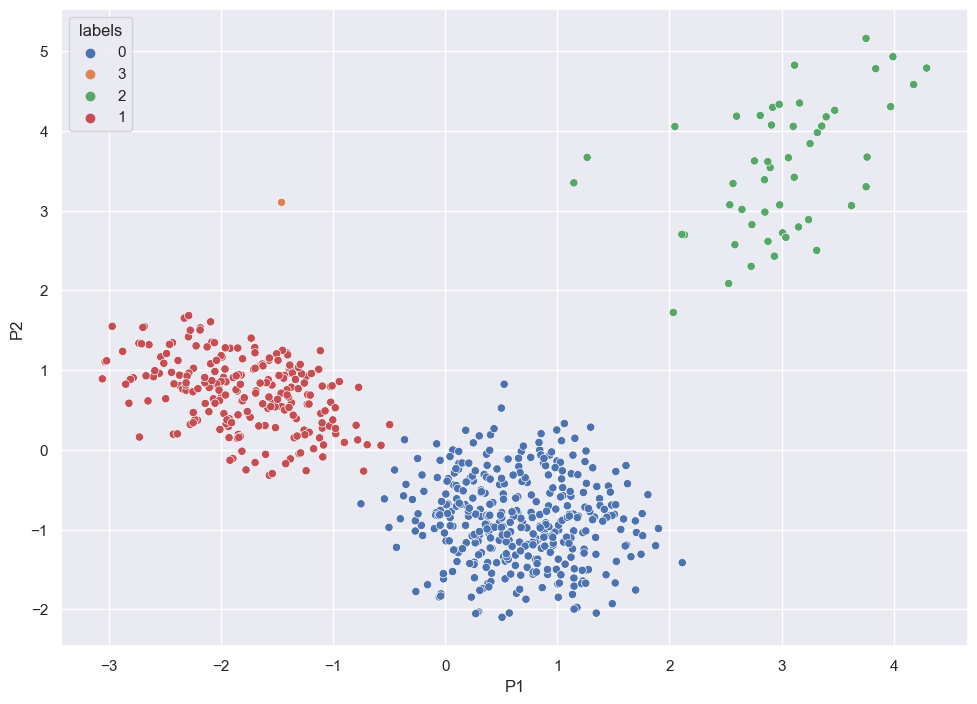

In [31]:
#para visualizar melhor essa distribuição, podemos cruzar algumas variáveis e ver como fica a clusterização
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2'])
principalDf['labels']=df_meanshift['labels_meanshift']
sns.scatterplot(data=principalDf,x='P1',y='P2',hue='labels')

With a larger distance (bandwidth), we see more consistent clusters.

## 7) Gaussian Mixture

### 7.1) Number of clusters using BIC (Bayesian Information Criterion).


In [32]:
from sklearn.mixture import GaussianMixture

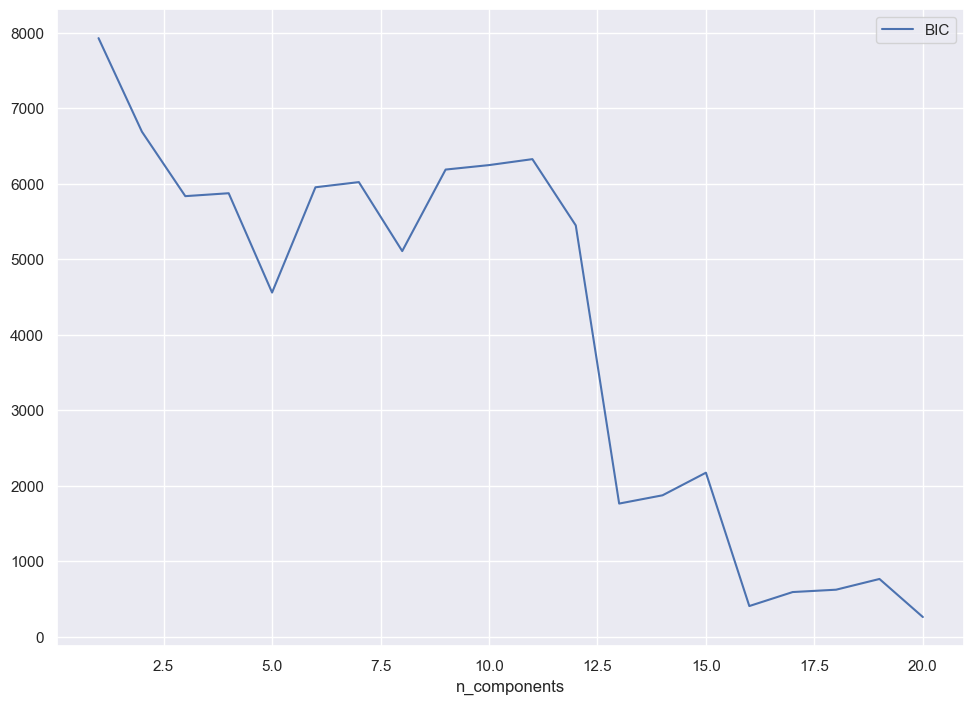

In [33]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data_scaled)
          for n in n_components]

plt.plot(n_components, [m.bic(data_scaled) for m in models], label='BIC')
plt.legend(loc='best')
plt.xlabel('n_components');

### 7.2) Model

In [34]:
gmm = GaussianMixture(3).fit(data_scaled)
labels_gaussian_mixture = gmm.predict(data_scaled)
df_gaussian=df
df_gaussian['labels_gaussian']=labels_gaussian_mixture.astype('str')

### 7.3) Cluster Analysis

<AxesSubplot: xlabel='P1', ylabel='P2'>

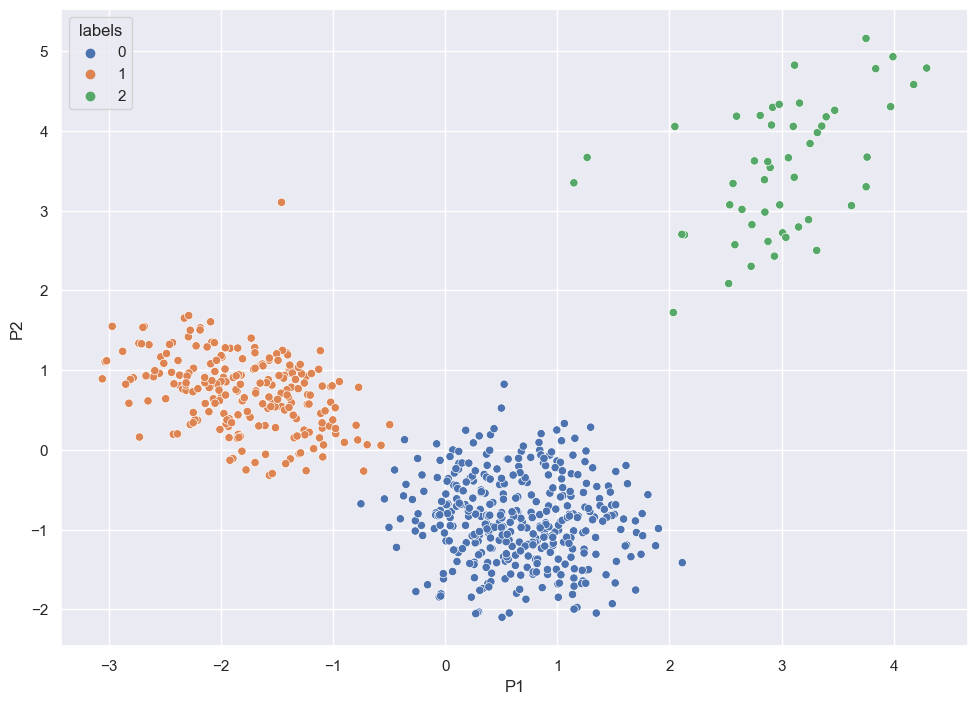

In [35]:
#para visualizar melhor essa distribuição, podemos cruzar algumas variáveis e ver como fica a clusterização
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2'])
principalDf['labels']= df_gaussian['labels_gaussian']
sns.scatterplot(data=principalDf,x='P1',y='P2',hue='labels')

## 8) Comparison between clusters



<AxesSubplot: xlabel='labels_gaussian', ylabel='Avg_Credit_Limit'>

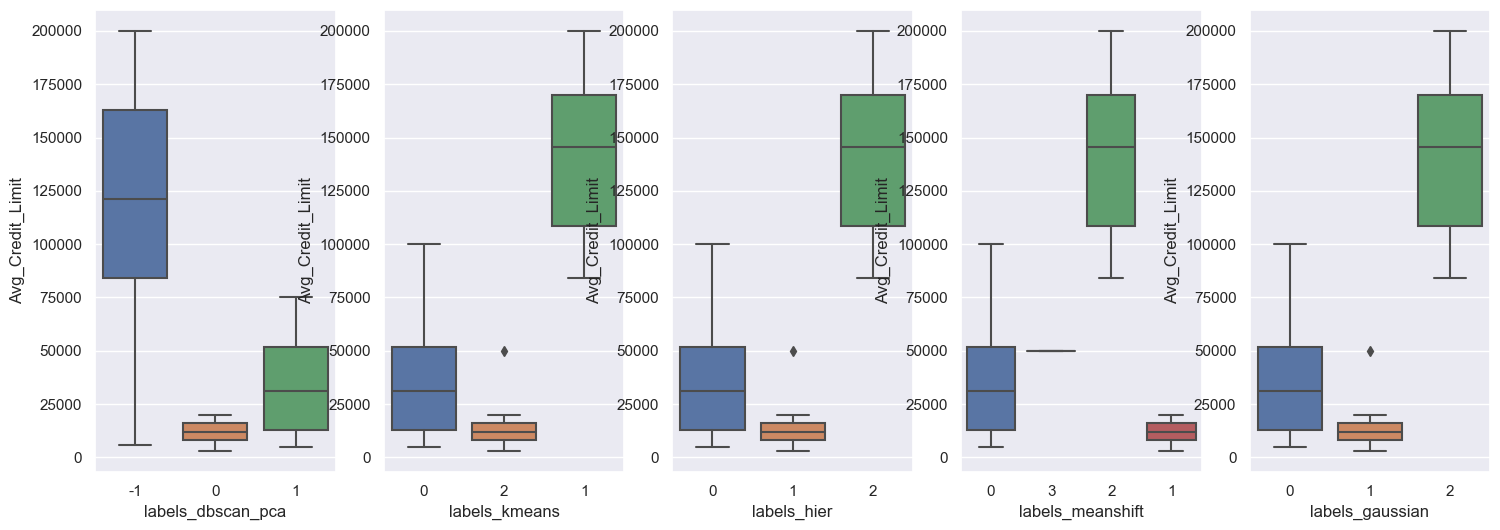

In [36]:
f, axes = plt.subplots(1, 5,figsize=(18, 6))
sns.boxplot(data=df_dbscan_PCA,x='labels_dbscan_pca',y='Avg_Credit_Limit',ax=axes[0])
sns.boxplot(data=df_kmeans,x='labels_kmeans',y='Avg_Credit_Limit',ax=axes[1])
sns.boxplot(data=df_hier,x='labels_hier',y='Avg_Credit_Limit',ax=axes[2])
sns.boxplot(data=df_meanshift,x='labels_meanshift',y='Avg_Credit_Limit',ax=axes[3])
sns.boxplot(data=df_gaussian,x='labels_gaussian',y='Avg_Credit_Limit',ax=axes[4])


<AxesSubplot: xlabel='labels_gaussian', ylabel='Total_Credit_Cards'>

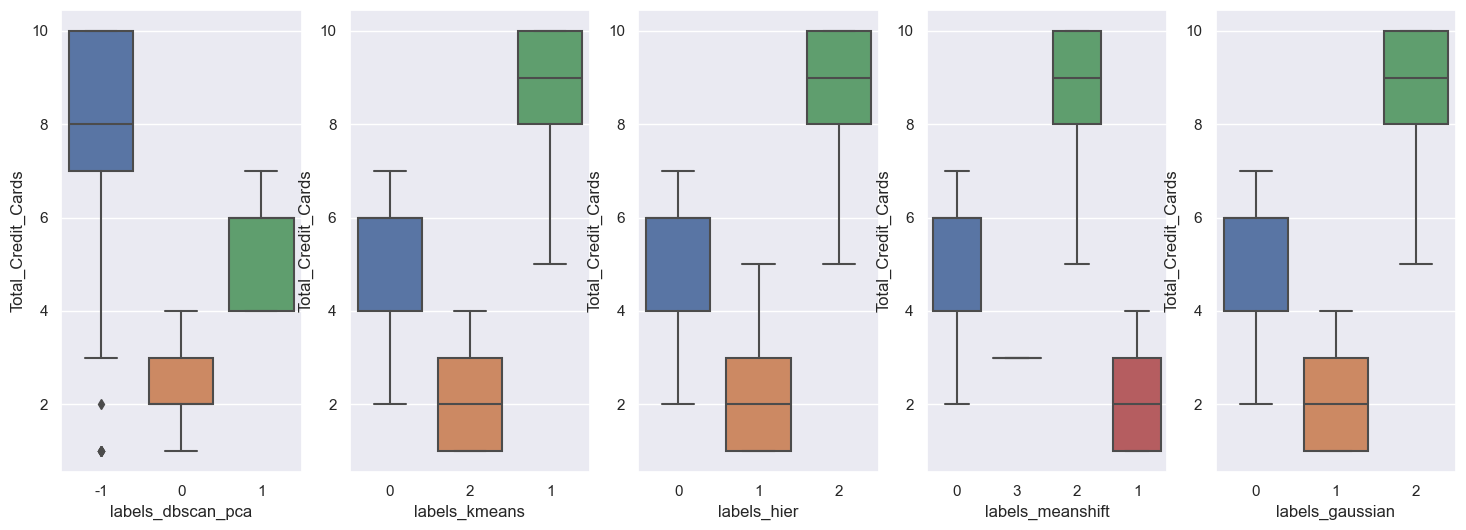

In [37]:
f, axes = plt.subplots(1, 5,figsize=(18, 6))
sns.boxplot(data=df_dbscan_PCA,x='labels_dbscan_pca',y='Total_Credit_Cards',ax=axes[0])
sns.boxplot(data=df_kmeans,x='labels_kmeans',y='Total_Credit_Cards',ax=axes[1])
sns.boxplot(data=df_hier,x='labels_hier',y='Total_Credit_Cards',ax=axes[2])
sns.boxplot(data=df_meanshift,x='labels_meanshift',y='Total_Credit_Cards',ax=axes[3])
sns.boxplot(data=df_gaussian,x='labels_gaussian',y='Total_Credit_Cards',ax=axes[4])

<AxesSubplot: xlabel='labels_gaussian', ylabel='Total_visits_bank'>

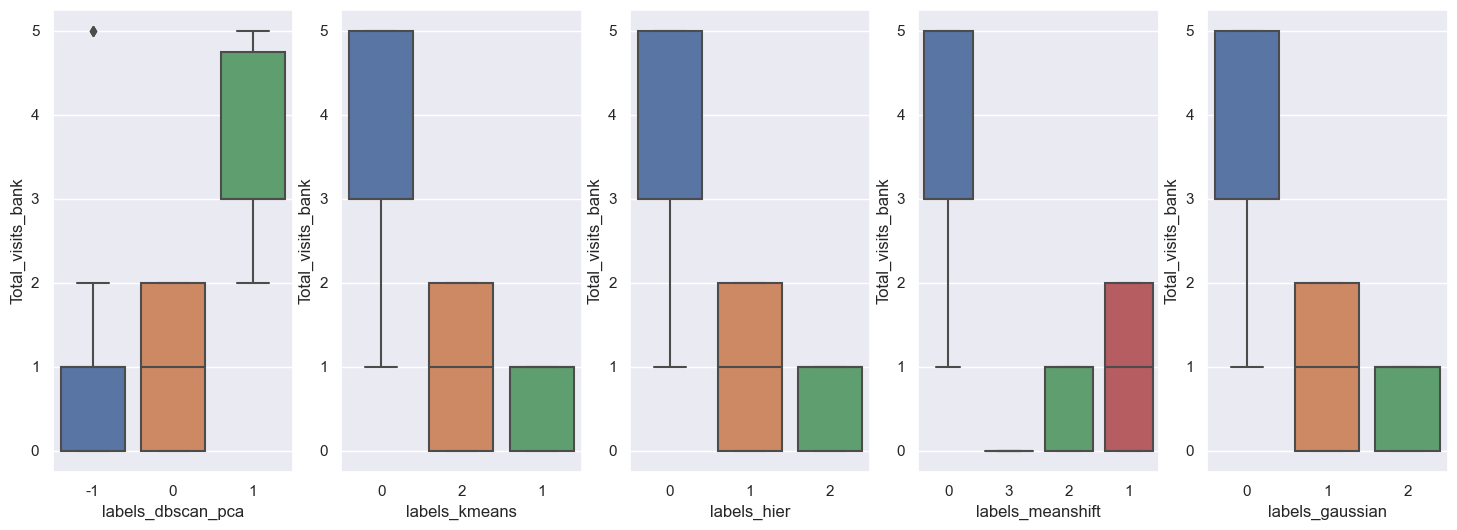

In [38]:
f, axes = plt.subplots(1, 5,figsize=(18, 6))
sns.boxplot(data=df_dbscan_PCA,x='labels_dbscan_pca',y='Total_visits_bank',ax=axes[0])
sns.boxplot(data=df_kmeans,x='labels_kmeans',y='Total_visits_bank',ax=axes[1])
sns.boxplot(data=df_hier,x='labels_hier',y='Total_visits_bank',ax=axes[2])
sns.boxplot(data=df_meanshift,x='labels_meanshift',y='Total_visits_bank',ax=axes[3])
sns.boxplot(data=df_gaussian,x='labels_gaussian',y='Total_visits_bank',ax=axes[4])

<AxesSubplot: xlabel='labels_gaussian', ylabel='Total_visits_online'>

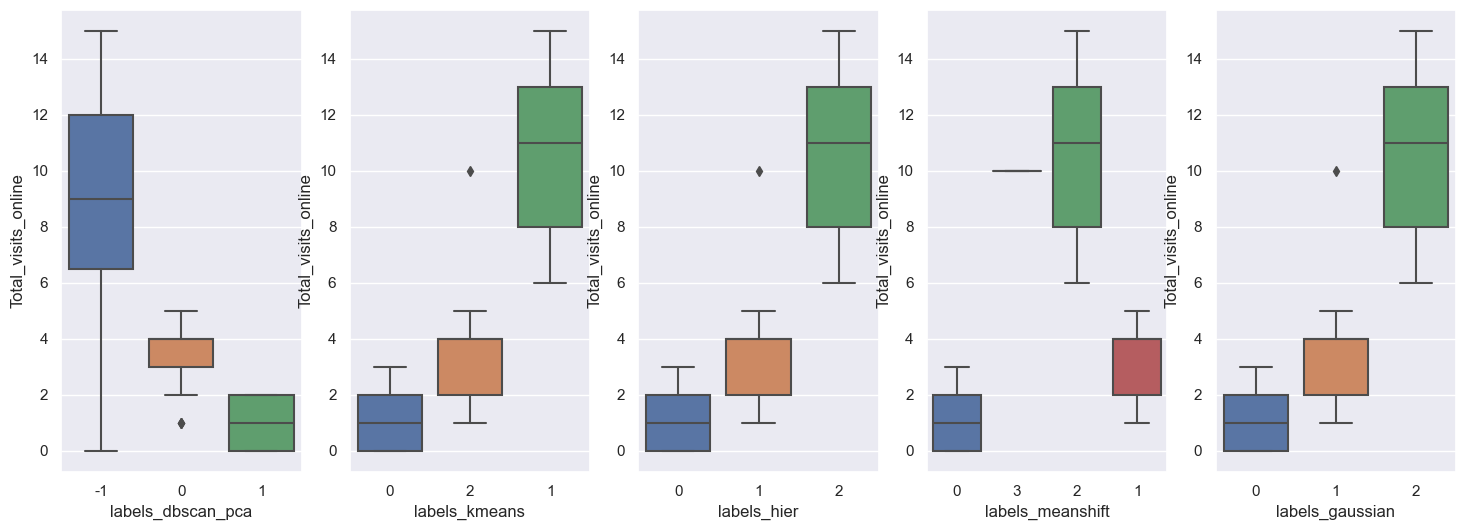

In [39]:
f, axes = plt.subplots(1, 5,figsize=(18, 6))
sns.boxplot(data=df_dbscan_PCA,x='labels_dbscan_pca',y='Total_visits_online',ax=axes[0])
sns.boxplot(data=df_kmeans,x='labels_kmeans',y='Total_visits_online',ax=axes[1])
sns.boxplot(data=df_hier,x='labels_hier',y='Total_visits_online',ax=axes[2])
sns.boxplot(data=df_meanshift,x='labels_meanshift',y='Total_visits_online',ax=axes[3])
sns.boxplot(data=df_gaussian,x='labels_gaussian',y='Total_visits_online',ax=axes[4])

<AxesSubplot: xlabel='labels_gaussian', ylabel='Total_calls_made'>

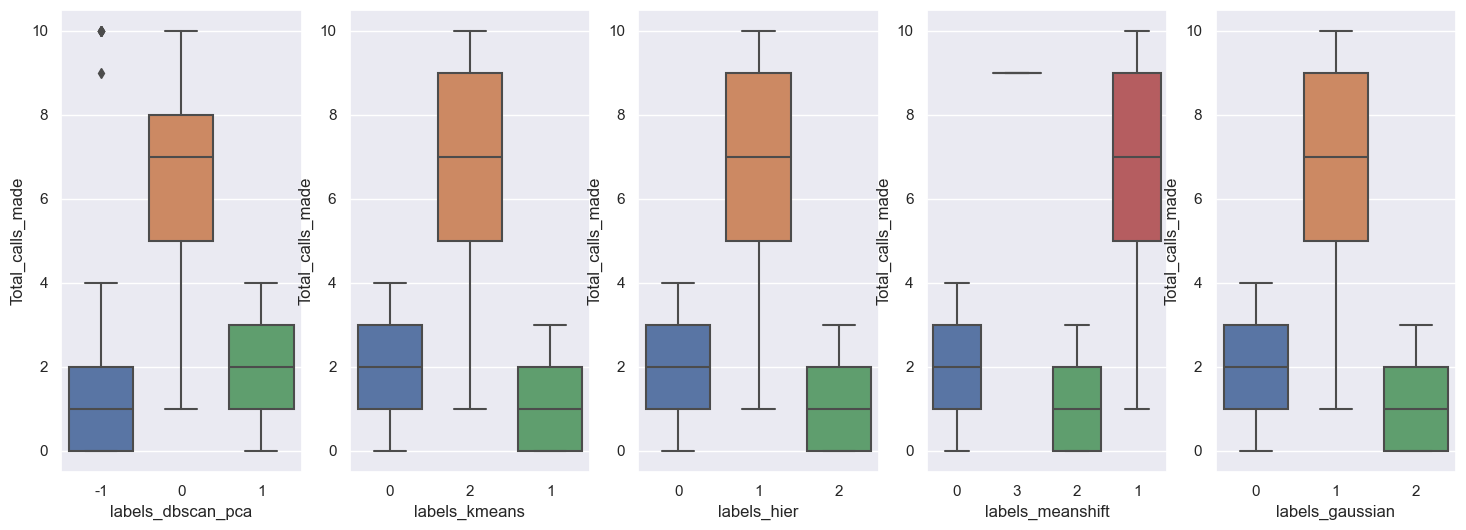

In [40]:
f, axes = plt.subplots(1, 5,figsize=(18, 6))
sns.boxplot(data=df_dbscan_PCA,x='labels_dbscan_pca',y='Total_calls_made',ax=axes[0])
sns.boxplot(data=df_kmeans,x='labels_kmeans',y='Total_calls_made',ax=axes[1])
sns.boxplot(data=df_hier,x='labels_hier',y='Total_calls_made',ax=axes[2])
sns.boxplot(data=df_meanshift,x='labels_meanshift',y='Total_calls_made',ax=axes[3])
sns.boxplot(data=df_gaussian,x='labels_gaussian',y='Total_calls_made',ax=axes[4])

## 9) Conclusion

Before defining the profiles, it is important to mention that the hierarchical clustering, Meanshift, Gaussian Mixture, and KMeans algorithms had similar results. After analyzing the PCA plot, it was clear that the DBSCAN clustering was not satisfactory.

When observing the clusters and the description of each variable, we have some variables that show differences between populations, as seen in the boxplots. Based on this, we can create three customer profiles:

Cluster 0 consists of customers with low to medium credit limits, a medium number of credit cards, high bank visits, low online visits, and low phone calls made.
Cluster 1 consists of customers with low credit limits, a low number of credit cards, low bank visits, high online visits, and phone calls made.
Cluster 2 consists of customers with high credit limits, a high number of credit cards, low bank visits, high online visits, and low phone calls made.